In [1]:
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pathlib import Path
from   pprint import pprint
import seaborn as sns

%matplotlib inline

In [2]:
csv_path = Path("../data/survey_results_public.csv")
schema_path = Path("../data/survey_results_schema.csv")

In [13]:
df = pd.read_csv(csv_path, low_memory=False)
schema = pd.read_csv(schema_path)

In [14]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')

cols = [
    'Country',
    'FormalEducation',
    'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'SelfTaughtTypes',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'HoursComputer',
    'HoursOutside',
    'Exercise',
    'Gender',
    'SexualOrientation',
    'EducationParents',
    'RaceEthnicity',
    'Age',
    'Dependents',
]

df = df[cols]

In [15]:
df.shape

(98855, 12)

In [16]:
df.isnull().all(axis=1).sum()

4830

In [17]:
df.isnull().sum()

CompanySize           27324
DevType                6757
YearsCoding            5020
YearsCodingProf       20952
ConvertedSalary       51153
EducationTypes        30895
LanguageWorkedWith    20521
HoursComputer         26722
HoursOutside          26831
Exercise              26747
Age                   34281
Dependents            36259
dtype: int64

In [18]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=0, how='any', subset=['ConvertedSalary'])
df = df.reset_index()

In [19]:
df.shape

(47702, 13)

In [20]:
df.isnull().sum()

index                    0
CompanySize           6742
DevType                337
YearsCoding             19
YearsCodingProf        737
ConvertedSalary          0
EducationTypes        1853
LanguageWorkedWith    1220
HoursComputer         1718
HoursOutside          1772
Exercise              1697
Age                   2865
Dependents            3673
dtype: int64

In [21]:
df.head()

,index,CompanySize,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,LanguageWorkedWith,HoursComputer,HoursOutside,Exercise,Age,Dependents
0,1,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,70841.0,"Taught yourself a new language, framework, or ...",JavaScript;Python;Bash/Shell,5 - 8 hours,30 - 59 minutes,Daily or almost every day,35 - 44 years old,Yes
1,4,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,21426.0,Taken a part-time in-person course in programm...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Over 12 hours,1 - 2 hours,3 - 4 times per week,18 - 24 years old,Yes
2,5,10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,41671.0,Received on-the-job training in software devel...,Java;JavaScript;Python;TypeScript;HTML;CSS,9 - 12 hours,30 - 59 minutes,1 - 2 times per week,18 - 24 years old,No
3,6,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,120000.0,Received on-the-job training in software devel...,JavaScript;HTML;CSS,Over 12 hours,Less than 30 minutes,I don't typically exercise,18 - 24 years old,No
4,8,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,250000.0,Taken an online course in programming or softw...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,9 - 12 hours,Less than 30 minutes,I don't typically exercise,35 - 44 years old,Yes


In [11]:
pprint(list(df.CompanySize.unique()))

['1,000 to 4,999 employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 '10,000 or more employees',
 'Fewer than 10 employees',
 nan]


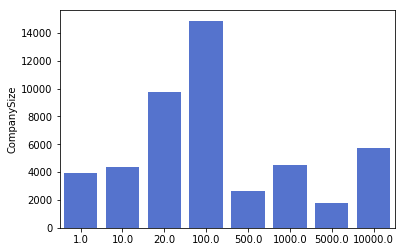

In [23]:
company_size_mapping = {
    'Fewer than 10 employees': 1,
    '10 to 19 employees': 10,
    '20 to 99 employees': 20,
    '100 to 499 employees': 100,
    '500 to 999 employees': 500,
    '1,000 to 4,999 employees': 1000,
    '5,000 to 9,999 employees': 5000,
    '10,000 or more employees': 10000,
    np.nan: np.nan,
}

company_size = df.CompanySize.map(company_size_mapping)
company_size = company_size.fillna(company_size.median())

sns.barplot(x=company_size.value_counts().index, y=company_size.value_counts(), color='royalblue')
plt.show()

In [25]:
pprint(list(df.YearsCoding.unique()))

['30 or more years',
 '6-8 years',
 '9-11 years',
 '0-2 years',
 '15-17 years',
 '18-20 years',
 '3-5 years',
 '12-14 years',
 '24-26 years',
 '21-23 years',
 '27-29 years',
 nan]


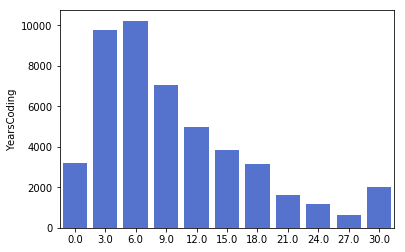

In [27]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 3,
    '6-8 years': 6,
    '9-11 years': 9,
    '12-14 years': 12,
    '15-17 years': 15,
    '18-20 years': 18,
    '21-23 years':21,
    '24-26 years': 24,
    '27-29 years': 27,
    '30 or more years': 30,
    np.nan: np.nan,
}

years_coding = df.YearsCoding.map(years_coding_mapping)
years_coding = years_coding.fillna(years_coding.median())

sns.barplot(x=years_coding.value_counts().index, y=years_coding.value_counts(), color='royalblue')
plt.show()

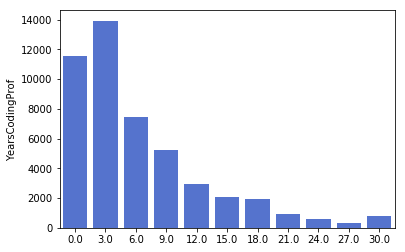

In [28]:
years_coding_prof = df.YearsCodingProf.map(years_coding_mapping)
years_coding_prof = years_coding_prof.fillna(years_coding_prof.median())

sns.barplot(x=years_coding_prof.value_counts().index, y=years_coding_prof.value_counts(), color='royalblue')
plt.show()

In [30]:
pprint(list(df.HoursComputer.unique()))

['5 - 8 hours',
 'Over 12 hours',
 '9 - 12 hours',
 '1 - 4 hours',
 nan,
 'Less than 1 hour']


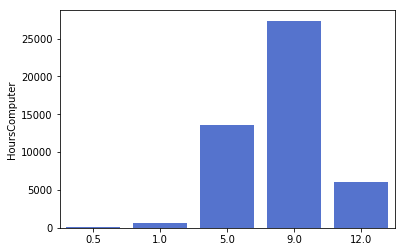

In [32]:
hours_computer_mapping = {
    'Less than 1 hour': 0.5,
    '1 - 4 hours': 1,
    '5 - 8 hours': 5,
    '9 - 12 hours': 9,
    'Over 12 hours': 12,
    np.nan: np.nan,
}

hours_computer = df.HoursComputer.map(hours_computer_mapping)
hours_computer = hours_computer.fillna(hours_computer.median())

sns.barplot(x=hours_computer.value_counts().index, y=hours_computer.value_counts(), color='royalblue')
plt.show()

In [33]:
pprint(list(df.HoursOutside.unique()))

['30 - 59 minutes',
 '1 - 2 hours',
 'Less than 30 minutes',
 '3 - 4 hours',
 'Over 4 hours',
 nan]


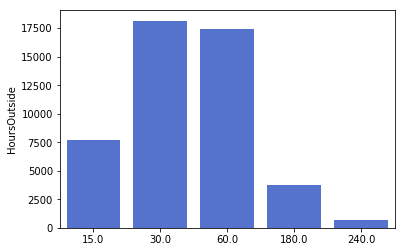

In [34]:
hours_outside_mapping = {
    'Less than 30 minutes': 15,
    '30 - 59 minutes': 30,
    '1 - 2 hours': 60,
    '3 - 4 hours': 180,
    'Over 4 hours': 240,
    np.nan: np.nan,
}

hours_outside = df.HoursOutside.map(hours_outside_mapping)
hours_outside = hours_outside.fillna(hours_outside.median())

sns.barplot(x=hours_outside.value_counts().index, y=hours_outside.value_counts(), color='royalblue')
plt.show()

In [36]:
pprint(list(df.Exercise.unique()))

['Daily or almost every day',
 '3 - 4 times per week',
 '1 - 2 times per week',
 "I don't typically exercise",
 nan]


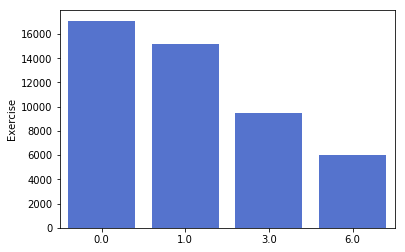

In [37]:
exercise_mapping = {
    "I don't typically exercise": 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 3,
    'Daily or almost every day': 6,
     np.nan: np.nan,
}

exercise = df.Exercise.map(exercise_mapping)
exercise = exercise.fillna(exercise.median())

sns.barplot(x=exercise.value_counts().index, y=exercise.value_counts(), color='royalblue')
plt.show()

In [39]:
pprint(list(df.Age.unique()))

['35 - 44 years old',
 '18 - 24 years old',
 '25 - 34 years old',
 '45 - 54 years old',
 nan,
 '55 - 64 years old',
 'Under 18 years old',
 '65 years or older']


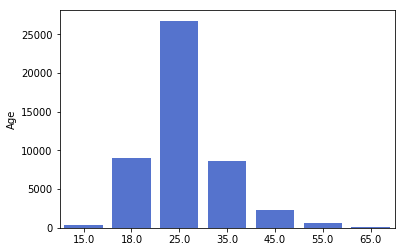

In [40]:
age_mapping = {
    'Under 18 years old': 15,
    '18 - 24 years old': 18,
    '25 - 34 years old': 25,
    '35 - 44 years old': 35,
    '45 - 54 years old': 45,
    '55 - 64 years old': 55,
    '65 years or older': 65,
    np.nan: np.nan, 
}

age = df.Age.map(age_mapping)
age = age.fillna(age.median())

sns.barplot(x=age.value_counts().index, y=age.value_counts(), color='royalblue')
plt.show()

In [42]:
pprint(list(df.Dependents.unique()))

['Yes', 'No', nan]


In [43]:
dependents = pd.get_dummies(df.Dependents, prefix='Dependents')

In [45]:
dev_list = []
for entry in df.DevType:
    if entry is np.nan:
        pass
    else:
        dev_list.extend(entry.split(';'))

dev_counter = Counter(dev_list)
dev_type_cols = sorted(dev_counter.keys())
dev_counter

Counter({'Database administrator': 7135,
         'DevOps specialist': 6087,
         'Full-stack developer': 25339,
         'System administrator': 5745,
         'Data or business analyst': 4088,
         'Desktop or enterprise applications developer': 8807,
         'Game or graphics developer': 1950,
         'QA or test developer': 3603,
         'Student': 4736,
         'Back-end developer': 28987,
         'Front-end developer': 18489,
         'C-suite executive (CEO, CTO, etc.)': 1620,
         'Engineering manager': 2973,
         'Mobile developer': 9205,
         'Designer': 5490,
         'Marketing or sales professional': 476,
         'Embedded applications or devices developer': 2659,
         'Educator or academic researcher': 1724,
         'Data scientist or machine learning specialist': 3763,
         'Product manager': 2278})

In [47]:
class DefaultEntry:
    
    def __init__(self, keys, default_value=0):
        self._keys = keys
        self._default_value = default_value
        self._row_dict = {key: default_value for key in keys}
        
    def to_dict(self):
        return self._row_dict

    def to_df(self):
        return pd.DataFrame(self._row_dict)
    
    

dev_types = []
for entry in df.DevType:
    if entry is np.nan:
        dev_types.append(DefaultEntry(dev_type_cols).to_dict())
    else:
        new_entry = DefaultEntry(dev_type_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        dev_types.append(new_entry)
        
dev_types = pd.DataFrame(dev_types)

dev_types.head()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [48]:
education_list = []
for entry in df.EducationTypes:
    if entry is np.nan:
        pass
    else:
        education_list.extend(entry.split(';'))

education_counter = Counter(education_list)
education_cols = sorted(education_counter.keys())
education_counter

Counter({'Taught yourself a new language, framework, or tool without taking a formal course': 40973,
         'Contributed to open source software': 19577,
         'Taken a part-time in-person course in programming or software development': 7782,
         'Received on-the-job training in software development': 17709,
         'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 11115,
         'Taken an online course in programming or software development (e.g. a MOOC)': 22665,
         'Participated in a hackathon': 12812,
         'Participated in a full-time developer training program or bootcamp': 4615,
         'Completed an industry certification program (e.g. MCPD)': 6647})

In [49]:
education_types = []
for entry in df.EducationTypes:
    if entry is np.nan:
        education_types.append(DefaultEntry(education_cols).to_dict())
    else:
        new_entry = DefaultEntry(education_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        education_types.append(new_entry)
        
education_types = pd.DataFrame(education_types)

education_types.head()

,Completed an industry certification program (e.g. MCPD),Contributed to open source software,Participated in a full-time developer training program or bootcamp,Participated in a hackathon,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",Received on-the-job training in software development,Taken a part-time in-person course in programming or software development,Taken an online course in programming or software development (e.g. a MOOC),"Taught yourself a new language, framework, or tool without taking a formal course"
0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,1
2,0,0,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,1
4,0,1,0,1,0,0,0,1,1


In [50]:
language_list = []
for entry in df.LanguageWorkedWith:
    if entry is np.nan:
        pass
    else:
        language_list.extend(entry.split(';'))

language_counter = Counter(language_list)
language_cols = sorted(language_counter.keys())
language_counter

Counter({'JavaScript': 33804,
         'Python': 18199,
         'Bash/Shell': 20408,
         'C': 9151,
         'C++': 10566,
         'Java': 20136,
         'Matlab': 2400,
         'R': 2908,
         'SQL': 27823,
         'TypeScript': 9085,
         'HTML': 32257,
         'CSS': 30864,
         'Assembly': 2748,
         'CoffeeScript': 1752,
         'Erlang': 549,
         'Go': 3671,
         'Lua': 1585,
         'Ruby': 5295,
         'PHP': 13660,
         'VB.NET': 3058,
         'C#': 16764,
         'Swift': 3816,
         'Kotlin': 2186,
         'Objective-C': 3371,
         'Rust': 1163,
         'Groovy': 2328,
         'Scala': 2237,
         'F#': 738,
         'Haskell': 1157,
         'Perl': 2030,
         'Visual Basic 6': 1619,
         'VBA': 2237,
         'Ocaml': 235,
         'Delphi/Object Pascal': 1071,
         'Julia': 217,
         'Hack': 109,
         'Clojure': 696,
         'Cobol': 302})

In [51]:
languages = []
for entry in df.LanguageWorkedWith:
    if entry is np.nan:
        languages.append(DefaultEntry(language_cols).to_dict())
    else:
        new_entry = DefaultEntry(language_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        languages.append(new_entry)
        
languages = pd.DataFrame(languages)

languages.head()

,Assembly,Bash/Shell,C,C#,C++,CSS,Clojure,Cobol,CoffeeScript,Delphi/Object Pascal,...,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [55]:
converted_salary = df.ConvertedSalary.copy()

df_cleaned = pd.concat([
    company_size,
    years_coding,
    years_coding_prof,
    hours_computer,
    hours_outside,
    exercise,
    age,
    dependents,
    dev_types,
    education_types,
    languages,
    converted_salary,
], axis=1)

df.shape

(47702, 13)

## Finally doing it!!!

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [144]:
X = df_cleaned.drop(axis=1, labels='ConvertedSalary')
y = df_cleaned.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.04041907958373059
Train MSE: 39128711714.30795
Test R2: 0.03615659683935968
Test MSE: 40107034635.66047


In [145]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_test_pred)

0.03619409523128525

Drop outliers?

In [146]:
df_drop_outliers = df_cleaned[df_cleaned.ConvertedSalary < 250000]

In [148]:
X = df_drop_outliers.drop(axis=1, labels='ConvertedSalary')
y = df_drop_outliers.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.40036549287563894
Train MSE: 1226809552.0668216
Test R2: 0.3999853007502785
Test MSE: 1260207152.215957


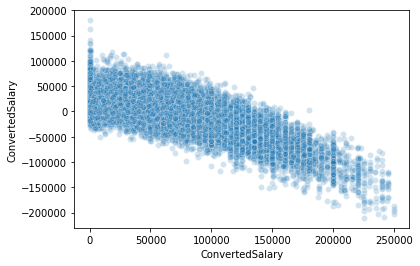

In [149]:
train_resid = y_train_pred - y_train
sns.scatterplot(y_train, train_resid, alpha=0.2)

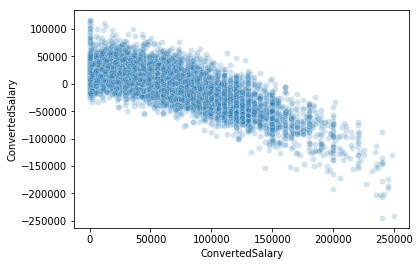

In [150]:
test_resid = y_test_pred - y_test
sns.scatterplot(y_test, test_resid, alpha=0.2)

In [155]:
y = np.sqrt(df_drop_outliers.ConvertedSalary.values + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.437253255140887
Train MSE: 5574.473887434798
Test R2: 0.43779942345380096
Test MSE: 5643.252052922042


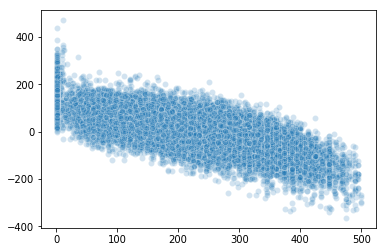

In [156]:
train_resid = y_train_pred - y_train
sns.scatterplot(y_train, train_resid, alpha=0.2)

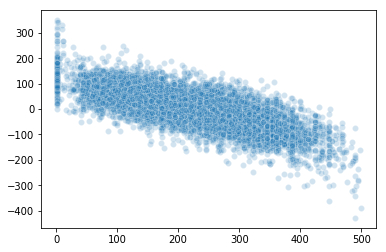

In [157]:
test_resid = y_test_pred - y_test
sns.scatterplot(y_test, test_resid, alpha=0.2)

In [158]:
feature_weights = pd.DataFrame({'feature': X_train.columns, 'weight': lm.coef_}).sort_values(by='weight')
feature_weights

,feature,weight
27,Student,-56.071373
47,Delphi/Object Pascal,-25.705365
63,PHP,-20.340593
22,Game or graphics developer,-14.662927
17,Educator or academic researcher,-12.981892
40,C,-12.715574
35,Taken a part-time in-person course in programm...,-12.679633
24,Mobile developer,-12.606349
75,Visual Basic 6,-12.537482
45,Cobol,-10.068755


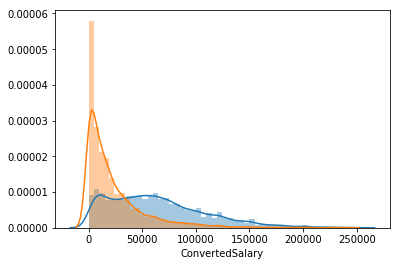

In [132]:
sns.distplot(df_drop_outliers.loc[df_drop_outliers.Student == 0, 'ConvertedSalary'])
sns.distplot(df_drop_outliers.loc[df_drop_outliers.Student == 1, 'ConvertedSalary'])
plt.show()

In [166]:
X_train.corr().mean()

CompanySize                                                0.013079
YearsCoding                                                0.067616
YearsCodingProf                                            0.059627
HoursComputer                                              0.020504
HoursOutside                                               0.021010
Exercise                                                   0.022668
Age                                                        0.037918
Dependents_No                                             -0.004475
Dependents_Yes                                             0.025005
Back-end developer                                         0.051761
C-suite executive (CEO, CTO, etc.)                         0.046057
Data or business analyst                                   0.040271
Data scientist or machine learning specialist              0.031945
Database administrator                                     0.063988
Designer                                        

In [186]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=[0.1, 0.3, 1, 3, 10, 30, 100], cv=3, n_jobs=2, random_state=42)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=[0.1, 0.3, 1, 3, 10, 30, 100], copy_X=True, cv=3, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=2,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

In [187]:
lasso_cv_model.score(X_train, y_train)

0.4361385098239363

In [189]:
lasso_cv_model.score(X_test, y_test)

0.4361699161840087

In [188]:
lasso_cv_model.coef_

array([ 3.18573470e-03,  1.90411089e+00,  2.47101383e+00, -6.10485431e-01,
       -3.00703407e-01,  2.84820888e+00,  1.28657272e+00,  9.27333083e+00,
        1.45344560e+01, -3.32190380e+00, -0.00000000e+00,  0.00000000e+00,
        4.50119671e+00, -6.97759971e+00, -7.40819968e+00, -5.13820976e+00,
        6.78313722e+00, -1.00487271e+01,  7.60905424e-01,  2.10771281e+01,
        1.03851844e+00,  7.26403119e+00, -1.24940408e+01,  0.00000000e+00,
       -1.15491654e+01,  0.00000000e+00,  0.00000000e+00, -5.59657020e+01,
       -6.16363313e+00,  1.19886222e+00,  1.25448294e+01, -0.00000000e+00,
        1.43869491e+01, -4.61023006e+00,  1.07678146e+01, -1.21025955e+01,
       -2.52707153e+00,  1.87935309e+01, -4.26377707e+00,  1.64318151e+01,
       -1.23809591e+01,  7.64699760e+00, -2.28582259e-01, -0.00000000e+00,
        8.32606539e+00, -0.00000000e+00,  2.11082080e+00, -2.18931437e+01,
        1.16230272e+00,  5.73389033e+00,  1.62255501e+01,  8.08841048e+00,
       -7.51479887e+00,  

In [192]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=[0.1, 0.3, 1, 3, 10, 30, 100], cv=3)
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   0.3,   1. ,   3. ,  10. ,  30. , 100. ]), cv=3,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [197]:
r2_score(y_train, ridge_cv_model.predict(X_train))

0.43711835056720416

In [198]:
r2_score(y_test, ridge_cv_model.predict(X_test))

0.43756342428097217

In [196]:
import xgboost
dir(xgboost)

['Booster',
 'DMatrix',
 'VERSION_FILE',
 'XGBClassifier',
 'XGBModel',
 'XGBRFClassifier',
 'XGBRFRegressor',
 'XGBRanker',
 'XGBRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'callback',
 'compat',
 'core',
 'cv',
 'f',
 'libpath',
 'os',
 'plot_importance',
 'plot_tree',
 'plotting',
 'rabit',
 'sklearn',
 'to_graphviz',
 'train',
 'training']

In [217]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_validate

xgb_model = XGBRegressor(objective='reg:squarederror', seed=42)
kfold = KFold(n_splits=5, random_state=42)
results = cross_validate(xgb_model, X_train, y_train, scoring='r2', cv=kfold)

In [221]:
results['test_score'].mean()

0.46099866456167204

In [222]:
?XGBRegressor

Init signature:
XGBRegressor(
    ['max_depth=3', 'learning_rate=0.1', 'n_estimators=100', 'verbosity=1', 'silent=None', "objective='reg:linear'", "booster='gbtree'", 'n_jobs=1', 'nthread=None', 'gamma=0', 'min_child_weight=1', 'max_delta_step=0', 'subsample=1', 'colsample_bytree=1', 'colsample_bylevel=1', 'colsample_bynode=1', 'reg_alpha=0', 'reg_lambda=1', 'scale_pos_weight=1', 'base_score=0.5', 'random_state=0', 'seed=None', 'missing=None', "importance_type='gain'", '**kwargs'],
)
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the le

In [224]:
from hyperopt import hp, tpe, Trials, fmin

space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
}

bayes_trials = Trials()

best_xgb_model = fmin(fn=None)

In [ ]:
# Need to use early stopping on xgboost algo
# Need to define objective 
# Do hyperopt and get outta here